# Proyecto 2: Modelación de Tsunami

**Fundamentos de Dinámica de Fluidos Computacional**<br>
**Profesor Christopher Cooper**<br>
**23 de Noviembre de 2017**

Valentina Oyarzún _201292003-5_ <br>
Joaquín Echaíz _201223520-0_
***

# Contenidos

1. [Introducción: Simulación de un Tsunami en 1 y 2 Dimensiones](#one)
2. [Desarrollo](#two) <br>
    2.1. [Simluación en 1 Dimension](#two1) <br>
    2.2. [Simulación en 2 Dimensiones](#two2) <br>
3. [Resultados](#three)
4. [Análisis y Conclusiones](#four)<br>
    4.1. [Simulación en 1 Dimensión](#four1)<br>
    4.2. [Simulación en 2 Dimensiones](#four2)<br>

# Introducción: Simulación de un Tsunami en una y dos Dimensiones <a class="anchor" id="one"></a>

En este informe se modelarán las ecuaciones de aguas someras, las cuales son válidos para casos en que la profundidad es significativamente menor que las distancias en otras direcciones.

\begin{equation}
\frac{\partial U}{\partial t} + \nabla \cdot F = 0
\end{equation}

Esta ecuación es de forma conservadora, por lo tanto se puede discretizar usando el esquema Lax-Friedrichs, un metodo FTCS (_forward time, centered space_) en donde se remplaza $U^{n}_{i}$ con el promedio de los nodos adyacentes. Este método es incondicionalmente estable.

Cuando la ola llega al borde de la malla en la costa, se refleja. Las condiciones de borde reflectivas para esta instancia son las siguientes:

\begin{equation}
V = \left( u \text{, } v \right) = 0\\
\frac{\partial h}{\partial n} = 0\\
\end{equation}

Cuando la ola llega al borde de la malla en el mar, se va hacia el infinito. Las condiciones de borde de salida para esta instancia son las siguientes:

\begin{equation}
\frac{\partial u}{\partial n} = 0 \text{ , }
\frac{\partial v}{\partial n} = 0 \text{ , }
\frac{\partial h}{\partial n} = 0\\
\end{equation}


### Ecuaciones de Aguas Someras en 1D

Se definen las variables auxiliares $U_1$, $U_2$, $F_1$, $F_2$.

\begin{equation}
U_1 = h\\
U_2 = hu\\
F_1 = hu\\
F_2 = hu^2 + \frac{1}{2} g h^2\\
\end{equation}

Discretizando,

\begin{equation}
U^{n+1}_i = \frac{1}{2} \left(  U^n_{i+1} + U^n_{i-1} \right) - \frac{\Delta t }{2 \Delta x} \left(  F^n_{i+1} - F^n_{i-1} \right)\\
\end{equation}

Esta ecuación nos sirve para encontrar los datos adelantados en el tiempo, interiores en el espacio. <br>
Condiciones de borde reflectivas:

\begin{equation}
\frac{\partial h}{\partial x} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ -1 \right] = U_1 \left[ -2 \right]\\
u = 0 \longrightarrow U_2 \left[ -1 \right] = 0\\
\end{equation}

Condiciones de borde de salida:

\begin{equation}
\frac{\partial h}{\partial x} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ 0 \right] = U_1 \left[ 1 \right]\\
\frac{\partial u}{\partial x} = \frac{\partial U_2}{\partial x} = 0 \longrightarrow U_2 \left[ 0 \right] = U_2 \left[ 1 \right]\\
\end{equation}


### Ecuaciones de Aguas Someras en 2D

Se definen las variables auxiliares $U_1$, $U_2$, $U_3$, $f_1$, $f_2$, $f_3$, $g_1$, $g_2$, $g_3$.

\begin{equation}
U_1 = h\\
U_2 = hu\\
U_2 = hv\\
f_1 = hu\\
f_2 = hu^2 + \frac{1}{2} g h^2\\
f_3 = huv\\
g_1 = hv\\
g_2 = huv\\
g_3 = hv^2 + \frac{1}{2} g h^2\\
\end{equation}

Discretizando,

\begin{equation}
U^{n+1}_{i,j} = \frac{1}{4} \left(  U^n_{i+1,j} + U^n_{i-1,j} + U^n_{i,j+1} + U^n_{i,j-1} \right) - \frac{\Delta t }{2 \Delta x} \left(  f^n_{i+1,j} - f^n_{i-1,j} \right) - \frac{\Delta t }{2 \Delta y} \left(  g^n_{i,j+1} - g^n_{i,j-1} \right)\\
\end{equation}

Nuevamente, esta ecuación nos sirve para encontrar los datos adelantados en el tiempo, interiores en el espacio.<br>
Condiciones de borde reflectiva, **Norte**:

\begin{equation}
\frac{\partial h}{\partial n} = \frac{\partial U_1}{\partial y} = 0 \longrightarrow U_1 \left[ 0,1:-1 \right] = U_1 \left[ 1, 1:-1 \right]\\
u = 0 \longrightarrow U_2 \left[ 0, 1:-1\right] = 0\\
v = 0 \longrightarrow U_3 \left[ 0, 1:-1 \right] = 0\\
\end{equation}

Condiciones de borde reflectiva, **Este**:

\begin{equation}
\frac{\partial h}{\partial n} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ 1:-1,-1 \right] = U_1 \left[ 1:-1, -2 \right]\\
u = 0 \longrightarrow U_2 \left[ 1:-1, -1 \right] = 0\\
v = 0 \longrightarrow U_3 \left[ 1:-1, -1 \right] = 0\\
\end{equation}

Condiciones de borde de salida: <br>
Debido a que se cumple que la derivada de $u$, $v$, y $h$ son iguales a cero, se puede determinar que las derivadas de $U_1$, $U_2$ y $U_3$ también son iguales a cero.

Borde **Sur**:

\begin{equation}
U_1 \left[ -1,1:-1 \right] = U_1 \left[ -2,1:-1 \right]\\
U_2 \left[ -1,1:-1 \right] = U_2 \left[ -2,1:-1 \right]\\
U_3 \left[ -1,1:-1 \right] = U_2 \left[ -2,1:-1 \right]\\
\end{equation}

Borde **Oeste**:

\begin{equation}
U_1 \left[ 1:-1,0 \right] = U_1 \left[ 1:-1,0 \right]\\
U_2 \left[ 1:-1,0 \right] = U_2 \left[ 1:-1,0 \right]\\
U_3 \left[ 1:-1,0 \right] = U_2 \left[ 1:-1,0 \right]\\
\end{equation}


**Esquinas**
Se definen los valores de las variables $U_1$, $U_2$ y $U_3$ en las esquinas de la malla como equivalentes al próximo valor interior en dirección normal. Es decir, el valor en $\left[ 0,0 \right]$ será equivalente a $\left[ 1,1 \right]$. Esto cumple con todas las condiciones de borde para cada variable de $U$.

### Presentación del Problema

Se modela el choque de una ola generada cerca de una costa.

1. Dominio: $-2 \leq x \leq 2$ <br>
2. Altura del agua en reposo: $ h_0 = 1$ <br>
3. Perfil inicial: $ h(x, t= 0) = h_0 + \Delta_{h} e^{-5 x^2}$ <br>
4. Paso de tiempo: $ dt = 2 \times 10^{-3}$ <br>
5. Malla: $501$ elementos para 1D; $401$ elementos para 2D.

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(precision=3)
%matplotlib inline
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 2. Desarrollo <a class="anchor" id="two"></a>

Para ambas simulaciones, se define una función que define nuevos valores de $U_1$, $U_2$ y $U_3$ para cada paso de tiempo dentro de un ciclo `while`. De estas variables se puede despejar los valores de $u$, $v$, y $h$. <br>

El ciclo `while` solo se detendrá para cuando la ola llegue a la costa. Se considera la llegada de la ola cuando la cresta, el valor máximo de $h$, se encuentra en el borde de la malla.

## 2.1 Simulación en una Dimensión <a class="anchor" id="two1"></a>

In [2]:
# Condiciones Iniciales

nx  = 501
dx  = 4./(nx-1)
x1  = numpy.linspace(-2, 2, nx)
dt  = 2*10**(-3)
g   = 9.81

h_0 = 1
dh  = 0.4

In [3]:
def tsunami1D(h_0, dh, dx, dt):
    
    h_t0 = h_0 + dh*numpy.exp(-5*x1**2)
    u_t0 = numpy.zeros(nx)
    
    h = h_t0
    u = u_t0
    #h_max = numpy.amax(h)
    
    pasos = 0
    
    while True:
        #while h[-1]!= h_max:
        
        U1 = h
        U2 = h*u
        F1 = h*u
        F2 = h*u**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        
        U1[1:-1] = .5*(U1_n[2:]+U1_n[:-2])-(dt/(2*dx))*(F1[2:]-F1[:-2])
        U2[1:-1] = .5*(U2_n[2:]+U2_n[:-2])-(dt/(2*dx))*(F2[2:]-F2[:-2])

        U1[-1] = U1[-2]
        U2[-1] = 0
        U1[0]  = U1[1]
        U2[0]  = U2[1]

        u = U2/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if h[-1]==h_max:
            break
        
    return u, h, pasos

## 2.2 Simulación en dos Dimensiónes <a class="anchor" id="two2"></a>

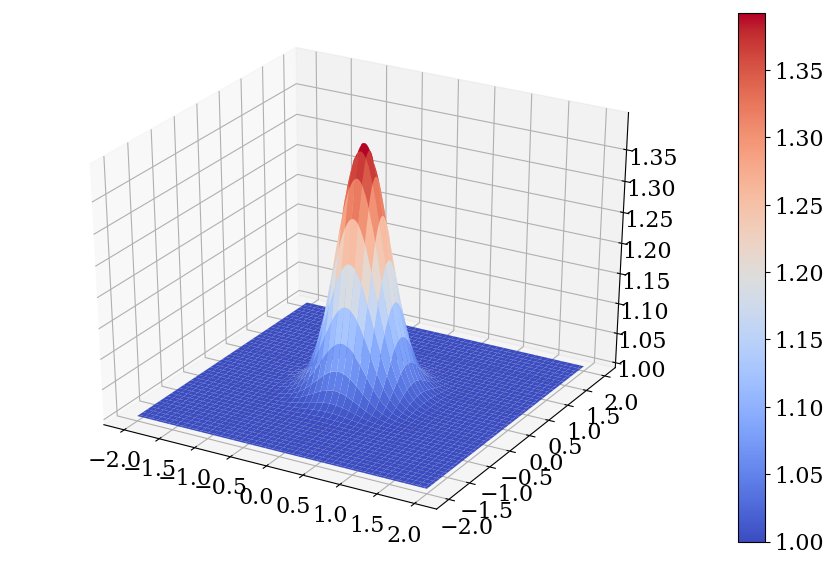

In [4]:
N  = 401
#delta = 4./(N-1)

x = numpy.linspace(-2, 2, N)
y = numpy.linspace(2, -2, N) 
X, Y = numpy.meshgrid(x,y)
g   = 9.81

h_t0 = h_0 + dh*numpy.exp(-5*(X**2+Y**2))

# Condición Inicial
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, Y, h_t0, cmap='coolwarm');
plt.colorbar(c)

In [5]:
def tsunami2D(N,h_0,dh):

    delta = 4./(N-1)
    x = numpy.linspace(-2, 2, N)
    y = numpy.linspace(2, -2, N) 
    X, Y = numpy.meshgrid(x,y)
    
    h_t0 = h_0 + dh*numpy.exp(-5*(X**2+Y**2))
    u_t0 = numpy.zeros((N,N))
    v_t0 = numpy.zeros((N,N))
    
    h = h_t0
    u = u_t0
    v= v_t0
    
    pasos = 0
    
    while True:        
        U1 = h
        U2 = h*u
        U3 = h*v
        
        f1 = h*u
        f2 = h*u**2+.5*g*h**2
        f3 = h*u*v
        
        g1 = h*v
        g2 = h*u*v
        g3 = h*v**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        U3_n = U3.copy()
        
        U1[1:-1, 1:-1] = .25*(U1_n[2:, 1:-1] + U1_n[:-2, 1:-1] + U1_n[1:-1, 2:] + U1_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f1[2:, 1:-1] - f1[:-2, 1:-1] + g1[1:-1, 2:] - g1[1:-1,:-2])
            
        U2[1:-1, 1:-1] = .25*(U2_n[2:, 1:-1] + U2_n[:-2, 1:-1] + U2_n[1:-1, 2:] + U2_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f2[2:, 1:-1] - f2[:-2, 1:-1] + g2[1:-1, 2:] - g2[1:-1,:-2])
            
        U3[1:-1, 1:-1] = .25*(U3_n[2:, 1:-1] + U3_n[:-2, 1:-1] + U3_n[1:-1, 2:] + U3_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f3[2:, 1:-1] - f3[:-2, 1:-1] + g3[1:-1, 2:] - g3[1:-1,:-2])

        
        # Condicion borde Norte
        U2[0,1:-1]=0
        U3[0,1:-1]=0
        U1[0,1:-1]=U1[1,1:-1]
        
        # Condicion borde Este
        U2[1:-1,-1]=0
        U3[1:-1,-1]=0
        U1[1:-1,-1]=U1[1:-1,-2]
        
        # Condición borde Oeste
        U2[1:-1,0]=U2[1:-1,1]
        U3[1:-1,0]=U3[1:-1,1]
        U1[1:-1,0]=U1[1:-1,1]
        
        # Condición borde Sur
        U2[-1,1:-1]=U2[-2,1:-1]
        U3[-1,1:-1]=U3[-2,1:-1]
        U1[-1,1:-1]=U1[-2,1:-1]
        
        # Esquinas N-O
        U1[0,0]=U1[1,1]
        U2[0,0]=U2[1,1]
        U3[0,0]=U3[1,1]
        
        # Esquinas N-E
        U1[0,-1]=U1[1,-2]
        U2[0,-1]=U2[1,-2]
        U3[0,-1]=U3[1,-2]
        
        # Esquinas E-S
        U1[-1,-1]=U1[-2,-2]
        U2[-1,-1]=U2[-2,-2]
        U3[-1,-1]=U3[-2,-2]
        
        # Esquinas O-S
        U1[-1,0]=U1[-2,1]
        U2[-1,0]=U2[-2,1]
        U3[-1,0]=U3[-2,1]

        u = U2/U1
        v = U3/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if numpy.amax(h[:,0])==h_max or numpy.amax(h[-1,:])==h_max:
            break
        
    return u,v, h, pasos, X, Y

# 3. Resultados <a class="anchor" id="three"></a>

** Para una dimensión: **<br>
Se modela la ola el momento que llega a la costa, despues de 232 pasos de tiempo.

Se requieren 232  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.464  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0499298897901 m/s
Altura maxima al tocar la costa  1.24982724016 m


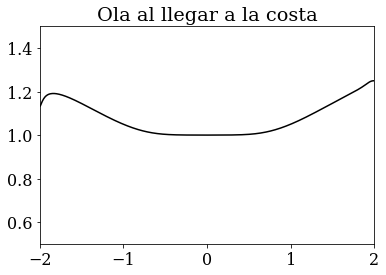

In [6]:
# ¿Cuántos pasos de tiempo tarda la ola en llegar a la costa?

uf, hf, pasosf = tsunami1D(h_0, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x1, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

** Para dos dimensiónes: **<br>
Se modela la ola el momento que llega a la costa, despues de 905  pasos de tiempo.

Los pasos de tiempo necesarios para que la ola llegue a la costa son  905 , equivalente a  1.81  [s]
La altura máxima h se encuentra en la esquina Noreste y es de:  1.12846793157 [m]
La diferencia entre la altura máxima y el nivel del mar $h_0=1$ [m] es de:  0.12846793157 [m]


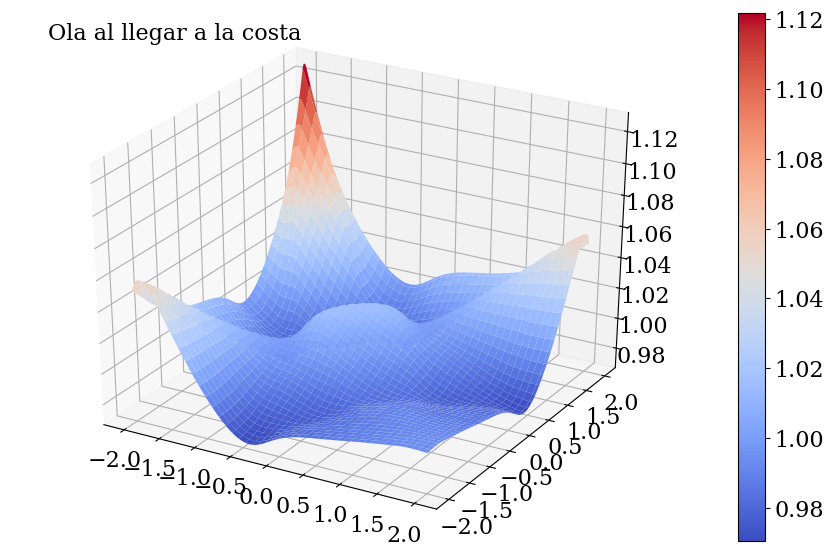

In [22]:
uff,vff,hff,pff,X,Y=tsunami2D(N, h_0, dh)


fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Ola al llegar a la costa", transform=ax.transAxes)

print("Los pasos de tiempo necesarios para que la ola llegue a la costa son ",pff,", equivalente a ",dt*pff," [s]")
print("La altura máxima h se encuentra en la esquina Noreste y es de: ",numpy.amax(hff),"[m]")
print("La diferencia entre la altura máxima y el nivel del mar $h_0=1$ [m] es de: ", numpy.amax(hff)-1,"[m]")

# 4. Análisis y Conclusiones <a class="anchor" id="four"></a>

## 4.1 Simulación en 1 Dimensión <a class="anchor" id="four1"></a>

**Variación del parámetro característico $h_0$** <br>
La variable $h_0$ representa la profundidad del mar sin perturbaciones. <br>
A continuación se estudiará la sensibilidad de la simulación a la variación del parámetro $h_0$.

Se requieren 290  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.58  segundos
Velocidad final del punto maximo al llegar a la costa es 0.111186717917 m/s
Altura maxima al tocar la costa  0.715302660628 m


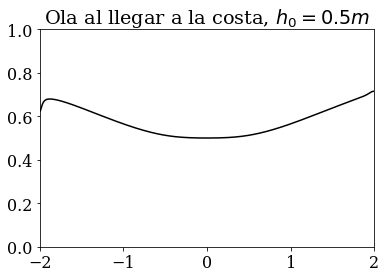

In [8]:
# Para h_0 = 0.5 m

uf, hf, pasosf = tsunami1D(0.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0, 1])
plt.plot(x1, hf, c='k')
plt.title('Ola al llegar a la costa, $h_0 = 0.5 m$')
plt.show()


Se requieren 200  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.4  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0330255085188 m/s
Altura maxima al tocar la costa  1.77008463845 m


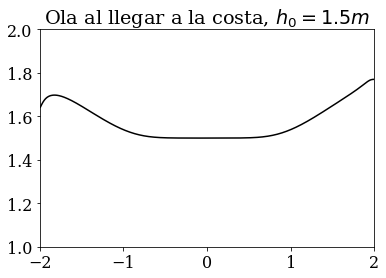

In [9]:
# Para h_0 = 1.5 m
uf, hf, pasosf = tsunami1D(1.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 1, 2])
plt.plot(x1, hf, c='k')
plt.title('Ola al llegar a la costa, $h_0 = 1.5 m$')
plt.show()

Al aumentar la profundidad de las aguas someras se pierde parte velocidad de la ola pero se gana altura (energía potencial) al llegar a la costa.

**Análisis de sensibilidad al parámetro $dh$** <br>
La variable $dh$ representa la magnitud de la perturbacion, la diferencia de altura inicial entre el punto más alto de la ola y el nivel del mar. <br>
Se realizará una variación respecto a la simulación original, cambiando la altura de la ola inicial. 

Se requieren 240  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.48  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0271925905468 m/s
Altura maxima al tocar la costa  1.18639878657 m


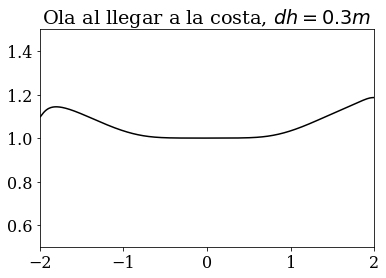

In [10]:
# Para dh = 0.3m

uf, hf, pasosf = tsunami1D(h_0, 0.3, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x1, hf, c='k')
plt.title('Ola al llegar a la costa, $dh = 0.3 m$')
plt.show()

Se requieren 219  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.438  segundos
Velocidad final del punto maximo al llegar a la costa es 0.219448056142 m/s
Altura maxima al tocar la costa  1.44850753425 m


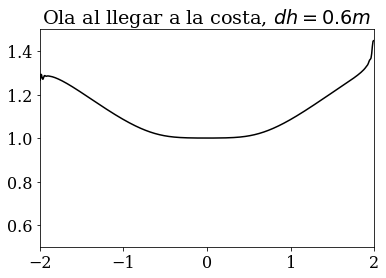

In [11]:
# Para dh = 0.6m

uf, hf, pasosf = tsunami1D(h_0, 0.6, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x1, hf, c='k')
plt.title('Ola al llegar a la costa, $dh = 0.6 m$')
plt.show()

Al aumentar la altura de la ola inicial, aumentan las alturas de las olas que llegan a la costa y sus velocidades.
Esto es una consecuencia directa de la formulación de las ecuaciones que gobiernan esta simulación, ya que se conserva la energía.

## 4.2 Simulación en 2 Dimensiones <a class="anchor" id="four2"></a>

Las velocidades de la ola $v$ y $u$ se comportan de distinta forma en el espacio, sin embargo la magnitud de la velocidad $c$ tiene un comportamiento más visible y acorde a lo que gáficamente resulta de la ola.

\begin{equation}
c=\sqrt{v^2+u^2}\\
\end{equation}

A continuación se modela $c$

La magnitud máxima de a velocidad en este fenomeno se encuentra en la misma esquina en donde choca la olacontra la costa (Noreste), esta es de  0.285281916266 [m/s]


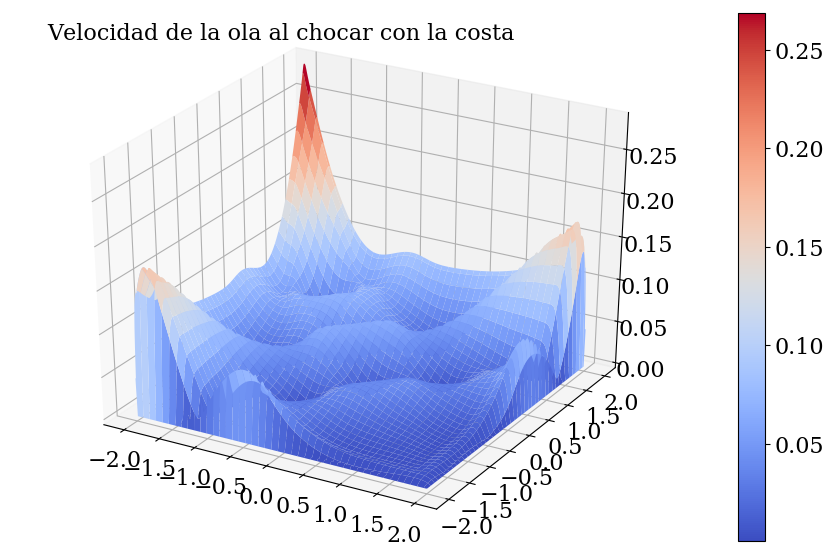

In [24]:
cc=(vff**2+uff**2)**0.5

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, cc, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Velocidad de la ola al chocar con la costa", transform=ax.transAxes)

print("La magnitud máxima de a velocidad en este fenomeno se encuentra en la misma esquina en donde choca la ola\
contra la costa (Noreste), esta es de ",numpy.amax(cc),"[m/s]")

Este gráfico muestra que la máxima magnitud de la velocidad $c$, se encuentra en el mismo punto que la altura máxima vista con anterioridad.

**Cambio en el valor característico $h_0$**

A continuación se realizan las mismas modificaciones que se hicieron en el caso de una dimensión. La primera de ellas consta de la sensibilidad que tiene la simulación al cambio del nivel del mar $h_0$. Se modelan las situaciones de $0.5[m]$, menor que la original, hasta $1.5[m]$, mayor que la original.

Simulación realizada para h_0=0.5[m] (menor a la original).
La altura máxima es de:  0.597636055918 [m]
La velocidad máxima es de:  0.307105254434 [m/s]


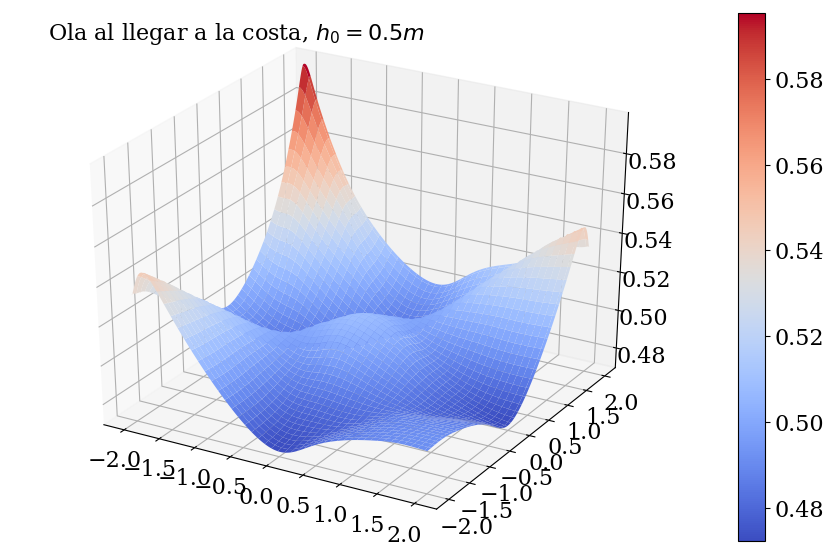

In [25]:
uff,vff,hff,pff,X,Y=tsunami2D(N, 0.5, dh)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Ola al llegar a la costa, $h_0=0.5m$", transform=ax.transAxes)

print("Simulación realizada para h_0=0.5[m] (menor a la original).")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

Simulación realizada para $h_0=1.5$[m] (mayor que la original), con una malla de $301^2$ elementos
La altura máxima es de:  1.59641974853 [m]
La velocidad máxima es de:  0.176793725369 [m/s]


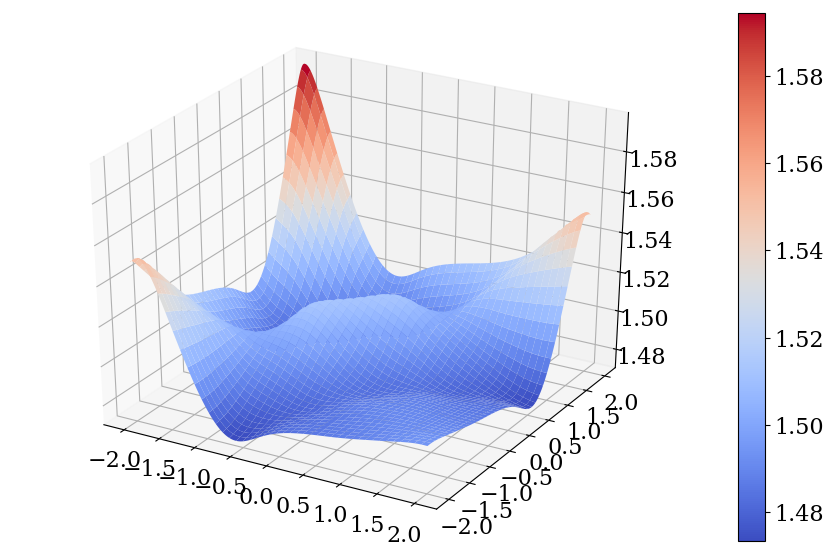

In [14]:
uff,vff,hff,pff,X,Y=tsunami2D(301, 1.5, dh)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Ola al llegar a la costa, $h_0=1.5m$", transform=ax.transAxes)

print("Simulación realizada para $h_0=1.5$[m] (mayor que la original), con una malla de $301^2$ elementos")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

Fue necesaria una segunda modificación para esta variante ya que se generaban errores, se debió cambiar la cantidad de nodos de $401$ a $301$.

Curiosamente la simulación que tomó una altura inicial inferior $h_0=0.5[m]$ logró una mayor altura en el choque contra la costa. Esto se debe a que la misma perturbación, o energía inyectada al sistema, actuó sobre una menor cantidad de agua, lo cual se traduce en una mayor altura, un aumento en energía potencial.

**Cambio en el valor característico $dh$**

A continuación se realizan cambios en el término $dh$, altura de la perturbación inicial de las simulaciones. Ejemplificando con una diferencia menor a la original $dh=0.3[m]$ y una mayor a la original $dh=0.6[m]$

Simulación entregada tras cambiar dh de la original por dh=0.3 (menor)
La altura máxima es de:  1.08495856099 [m]
La velocidad máxima es de:  0.189470011157 [m/s]


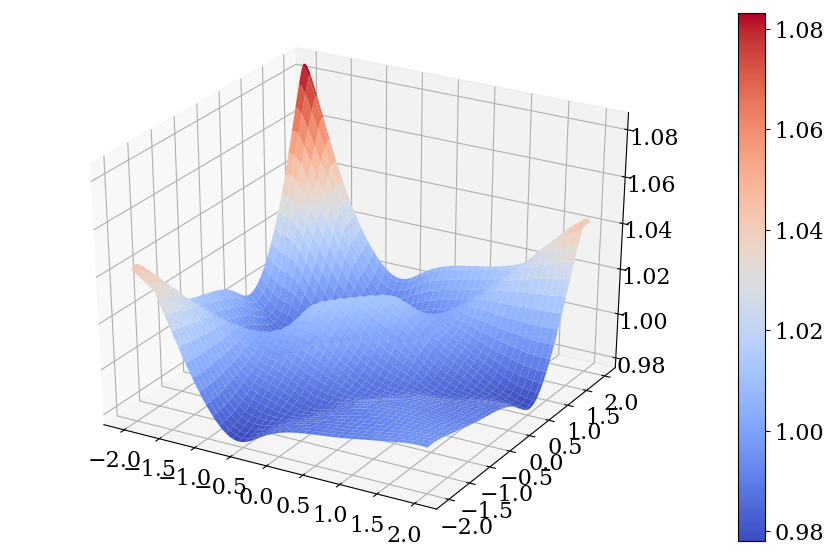

In [15]:
uff,vff,hff,pff,X,Y=tsunami2D(N, h_0, 0.3)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Ola al llegar a la costa, $dh=0.3m$", transform=ax.transAxes)

print("Simulación entregada tras cambiar dh de la original por dh=0.3 (menor)")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

Simulación entregada tras cambiar dh de la original por dh=0.6 (mayor), con una malla de $301^2$ elementos
La altura máxima es de:  1.13317278762 [m]
La velocidad máxima es de:  0.29868704491 [m/s]


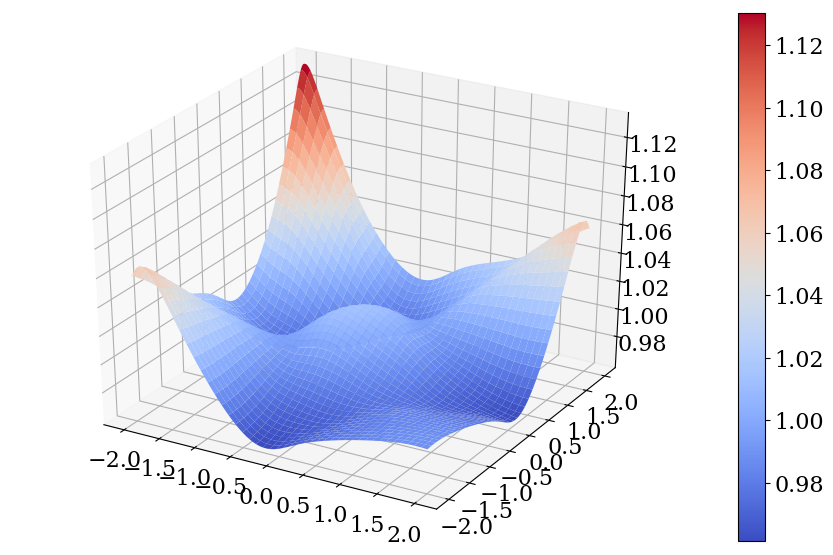

In [16]:
uff,vff,hff,pff,X,Y=tsunami2D(301, h_0, 0.6)

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
c=ax.plot_surface(X, -Y, hff, cmap='coolwarm');
plt.colorbar(c)
ax.text2D(0.05, 0.95, "Ola al llegar a la costa, $dh=0.6m$", transform=ax.transAxes)

print("Simulación entregada tras cambiar dh de la original por dh=0.6 (mayor), con una malla de $301^2$ elementos")
print("La altura máxima es de: ",numpy.amax(hff),"[m]")
print("La velocidad máxima es de: ",numpy.amax((uff**2+vff**2)**0.5),"[m/s]")

En el caso anterior fue necesario añadir otra variación en la simulación: se cambió tambien el número de nodos de la malla ya que presentaba errores en su ejecución.

Como es de esperarse, a una mayor altura de la perturbación inicial se logran mayores alturas en el choque de la ola contra la costa. Esto debido a que la energía potencial (elevación de la ola) que entra al sistema se conserva y se transforma tanto en enegía potencial, altura de la ola que va hacia la costa, como cinética, magnitud de la velocidad de esta.

**Validez**

Este tipo de simulación e implementación de ecuaciones es sólo válida cuando la profundidad del cuerpo de agua sea significativamente inferior en comparación a las distancias en que se propagará.

Bajo la premisa anterior no es posible utilizar este modelo **Shallow Water Equations** para modelar la propagación de tsunamis en alta mar, ya que la profundidad en esas zonas deja de ser significativamente inferior.

**Punto Crítico**

El punto crítico de este fenómeno es el punto en que encuentran las dos caras reflexivas que simulan ser la costa.
Los riesgos de esta geometría y el ángulo de $90^\cdot$ en las esquinas radica en cómo la malla es forzada a representar lo que ocurre pese a que sufre grandes distorciones, esto último es una fuente de errores importante en la simulación del problema (muchas veces este punto presentó anomalías en sus cálculos asociados).

También se trata de un punto crítico ya que es allí donde van a dar las reflecciones captadas por las caras, se produce una adición de energía y se ve finalmente representado como el punto con mayor energía potencial y cinética del fenómeno simulado.

$\spadesuit$